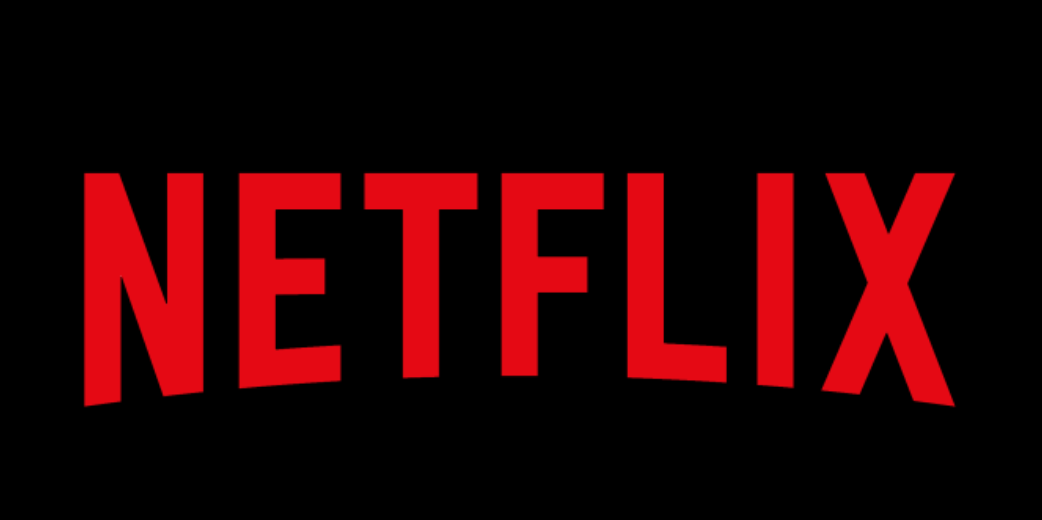

## OBJECTIVE:-
   - Classify consumers according to their appetite to subscribe to Netflix.
## DATA:-

    For reasons of confidentiality, the data is anonymized and augmented.

        - train.csv - the training set. it consists of an id column, the customers features, and a target column: target.
        - test.csv - the test set. it consists of everything in train.csv except target.
        - sample_submission.csv - a sample submission file in the correct format target=1 means that the customer subscribes               to Netflix

## IMPORTS

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold, RepeatedStratifiedKFold,StratifiedKFold,cross_val_predict
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')
sns.set()
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

- train.csv - the training set. it consists of an id column, the customers features, and a target column: target.
- test.csv - the test set. it consists of everything in train.csv except target.
- sample_submission.csv - a sample submission file in the correct format target=1 means that the customer subscribes to Netflix

##### IMPORTING THE DATASET 

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
%config Completer.use_jedi = False

###### BASIC ANALYSIS

In [4]:
df_train.head()

,id,target,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_497,feature_498,feature_499,feature_500,feature_501,feature_502,feature_503,feature_504,feature_505,feature_506
0,0,0,C0,C0,C1,C5,C11,37.56,54.756667,54.756667,...,0,0,0,0,0,0,0,0,0,0
1,1,0,C0,C0,C3,C5,C1,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,0,C0,C0,C3,C5,C2,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,3,0,C0,C0,C1,C5,C1,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,4,1,C0,C0,C3,C3,C11,37.48,37.480000,37.161333,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_test.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_497,feature_498,feature_499,feature_500,feature_501,feature_502,feature_503,feature_504,feature_505,feature_506
0,5,C0,C0,C0,C5,C2,37.638,36.361667,42.688333,31.66,...,0,0,0,0,0,0,0,0,0,0
1,7,C0,C0,C3,C5,C11,32.540,32.540000,39.403333,30.82,...,0,0,0,0,0,0,0,0,0,0
2,9,C0,C0,C1,C5,C1,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,11,C0,C0,C3,C5,C2,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,14,C0,C0,C1,C5,C10,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_train.shape, df_test.shape

((70000, 509), (30000, 508))

In [7]:
df_train.describe()

,id,target,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,...,feature_497,feature_498,feature_499,feature_500,feature_501,feature_502,feature_503,feature_504,feature_505,feature_506
count,70000.000000,70000.000000,25424.000000,26389.000000,27792.000000,25424.000000,26389.000000,27792.000000,25424.000000,26389.000000,...,70000.000000,70000.0,70000.000000,70000.0,70000.000000,70000.0,70000.000000,70000.000000,70000.0,70000.000000
mean,50025.281314,0.298186,40.124969,39.975888,38.937569,32.120109,31.533970,30.517150,2.891956,2.847829,...,-3.138300,0.0,-3.138300,0.0,3.138300,0.0,3.138300,-3.138300,0.0,3.138300
std,28878.675532,0.457465,21.415242,20.591512,20.364727,13.766195,13.330736,13.692785,2.294987,2.267976,...,17.344944,0.0,17.344944,0.0,17.344944,0.0,17.344944,17.344944,0.0,17.344944
min,0.000000,0.000000,-217.460000,-89.690000,-66.497000,-219.180000,-89.690000,-49.390000,-30.850000,-19.813333,...,-99.000000,0.0,-99.000000,0.0,0.000000,0.0,0.000000,-99.000000,0.0,0.000000
25%,24999.750000,0.000000,32.470000,32.470000,31.923333,30.750000,28.600000,27.215000,2.500000,2.500000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
50%,50030.500000,0.000000,37.480000,37.560000,37.030667,34.160000,33.320000,31.710000,2.500000,2.500000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
75%,75027.250000,1.000000,48.062750,48.490000,47.726458,35.830000,35.830000,35.830000,2.500000,2.500000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
max,99999.000000,1.000000,403.880000,639.756667,511.091667,148.360000,136.030000,136.030000,47.000000,53.556667,...,0.000000,0.0,0.000000,0.0,99.000000,0.0,99.000000,0.000000,0.0,99.000000


###### FINDING MISSING DATA

In [8]:
def get_missings(df):
    labels,values = list(),list()
    if df.isna().sum().sum()>0:
        for column in df.columns:
            if df[column].isnull().sum():
                labels.append(column)
                values.append((df[column].isnull().sum() / len(df[column]))*100)
        missings=pd.DataFrame({'Feature':labels,'MissingPercent':values }).sort_values(by='MissingPercent',ascending=False)
        return missings
    else:
        return False

In [9]:
Missings_df=get_missings(df_train)
Missings_df.head(5)

,Feature,MissingPercent
52,feature_193,100.00
55,feature_196,100.00
56,feature_197,100.00
57,feature_198,100.00
21,feature_83,98.32


Text(0, 0.5, 'The number of features')

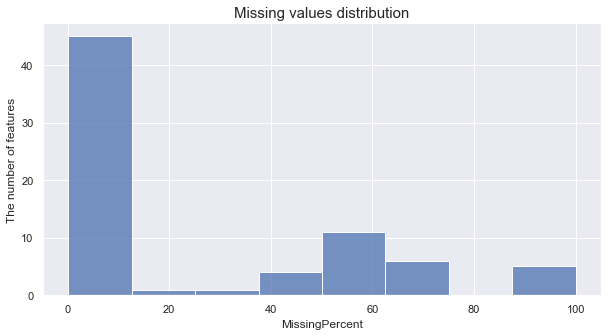

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(x=Missings_df.MissingPercent).set_title('Missing values distribution',size=15)
plt.ylabel('The number of features')

Text(0, 0.5, 'The number of features')

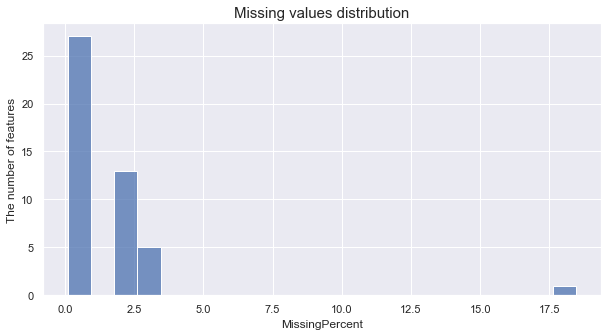

In [11]:
plt.figure(figsize=(10,5))
data = Missings_df[Missings_df.MissingPercent<25]
sns.histplot(x=data.MissingPercent).set_title('Missing values distribution',size=15)
plt.ylabel('The number of features')

- Get columns with more than 25% missing values
- Drop from train and test 

In [12]:

Missings_custom=Missings_df[Missings_df.MissingPercent>25]

df_train=df_train.drop(list(Missings_custom.Feature),axis=1)
df_test=df_test.drop(list(Missings_custom.Feature),axis=1)

Print categorical features name

In [13]:
Categorical_Features=df_train.select_dtypes(include=['object']).columns
Categorical_Features

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20',
       'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_27',
       'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32',
       'feature_33', 'feature_34', 'feature_41', 'feature_42', 'feature_54',
       'feature_55', 'feature_58', 'feature_97', 'feature_133', 'feature_134',
       'feature_135', 'feature_152', 'feature_163', 'feature_164',
       'feature_165', 'feature_185', 'feature_186', 'feature_187',
       'feature_188', 'feature_189', 'feature_190', 'feature_191',
       'feature_192', 'feature_199', 'feature_200', 'feature_201',
       'feature_205', 'feature_239', 'feature_240', 'feature_241',
       'feature_242', 'feature_243', 'feature_244', 'feature_246',
       'feature_247', 'feature_248', 'feature_249', 'feature_250',
       'feature_251', 'feature_270', 'feature_271', 'feature_272',
     

In [14]:
Numeric_Features=df_train.select_dtypes(exclude=['object']).columns[2:] #excluding id--> which will be dropeed latter stage
                                                                     #target will be assigned to y
Numeric_Features

Index(['feature_14', 'feature_15', 'feature_25', 'feature_26', 'feature_35',
       'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40',
       ...
       'feature_497', 'feature_498', 'feature_499', 'feature_500',
       'feature_501', 'feature_502', 'feature_503', 'feature_504',
       'feature_505', 'feature_506'],
      dtype='object', length=393)

Plot a pichart to show the percentage of numeric and categorical features

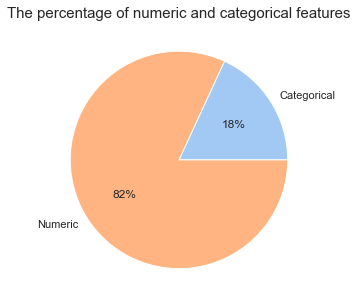

In [15]:
data = [len(Categorical_Features),len(Numeric_Features)]
colors = sns.color_palette('pastel')
plt.figure(figsize=(10,5))
plt.title('The percentage of numeric and categorical features',size=15)
plt.pie(data, colors = colors, labels=['Categorical','Numeric'] ,autopct = '%0.0f%%')
plt.show()

Fill with median

In [16]:
for col in Numeric_Features:
    df_train[col].fillna(df_train[col].median(),inplace=True)
    df_test[col].fillna(df_test[col].median(),inplace=True)

Fill with mode

In [17]:
def get_mode(feature,df):
    return df[feature].mode()[0]

for col in Categorical_Features:
    df_train[col].fillna(get_mode(col,df_train),inplace=True)
    df_test[col].fillna(get_mode(col,df_test),inplace=True)

Find columns that contain date objects

In [18]:

mask = df_train[Categorical_Features][:10].astype(str).apply(lambda x : x.str.match('(\d{2,4}(-|\/|\\|\.| )\d{2}(-|\/|\\|\.| )\d{2,4})+').any())
datetime_Features=df_train[Categorical_Features].loc[:,mask]

datetime_Features

,feature_191,feature_192,feature_199,feature_200,feature_201
0,11/10/2017,11/10/2017,11/10/2017,17/01/2016,11/10/2017
1,25/03/2015,25/03/2015,02/04/2017,25/03/2015,25/03/2015
2,27/01/2015,27/01/2015,24/03/2016,27/01/2015,27/01/2015
3,05/02/2014,01/04/2014,01/04/2014,01/04/2014,01/04/2014
4,20/07/2009,10/09/2013,10/09/2013,24/01/2016,10/09/2013
...,...,...,...,...,...
69995,27/09/2010,01/02/2014,01/02/2014,14/02/2014,01/02/2014
69996,19/09/2016,19/09/2016,19/09/2016,19/09/2016,19/09/2016
69997,14/09/2005,25/07/2015,25/07/2015,09/04/2016,25/07/2015
69998,29/11/2017,29/11/2017,29/11/2017,17/01/2016,29/11/2017


In [19]:
df_train.feature_191

0        11/10/2017
1        25/03/2015
2        27/01/2015
3        05/02/2014
4        20/07/2009
            ...    
69995    27/09/2010
69996    19/09/2016
69997    14/09/2005
69998    29/11/2017
69999    23/01/2018
Name: feature_191, Length: 70000, dtype: object

- Apply datetime format
- Show datetime features

In [20]:
df_train[datetime_Features.columns]= df_train[datetime_Features.columns].apply(pd.to_datetime,dayfirst=False)
df_test[datetime_Features.columns]= df_test[datetime_Features.columns].apply(pd.to_datetime,dayfirst=False)

datetime_tmp=df_train.select_dtypes(include=['datetime'])
datetime_tmp

,feature_191,feature_192,feature_199,feature_200,feature_201
0,2017-11-10,2017-11-10,2017-11-10,2016-01-17,2017-11-10
1,2015-03-25,2015-03-25,2017-02-04,2015-03-25,2015-03-25
2,2015-01-27,2015-01-27,2016-03-24,2015-01-27,2015-01-27
3,2014-05-02,2014-01-04,2014-01-04,2014-01-04,2014-01-04
4,2009-07-20,2013-10-09,2013-10-09,2016-01-24,2013-10-09
...,...,...,...,...,...
69995,2010-09-27,2014-01-02,2014-01-02,2014-02-14,2014-01-02
69996,2016-09-19,2016-09-19,2016-09-19,2016-09-19,2016-09-19
69997,2005-09-14,2015-07-25,2015-07-25,2016-09-04,2015-07-25
69998,2017-11-29,2017-11-29,2017-11-29,2016-01-17,2017-11-29


Get each part of datetime using pandas DatetimeIndex

In [21]:
for col in datetime_tmp.columns:
    df_train[col+"_year"]=pd.DatetimeIndex(df_train[col]).year
    df_train[col+"_month"]=pd.DatetimeIndex(df_train[col]).month
    df_train[col+"_week"]=pd.DatetimeIndex(df_train[col]).week
    df_train[col+"_day"]=pd.DatetimeIndex(df_train[col]).day

    
    df_test[col+"_year"]=pd.DatetimeIndex(df_test[col]).year
    df_test[col+"_month"]=pd.DatetimeIndex(df_test[col]).month
    df_test[col+"_week"]=pd.DatetimeIndex(df_test[col]).week
    df_test[col+"_day"]=pd.DatetimeIndex(df_test[col]).day

- Drop from train/test
- Update Categorical_Features list

In [22]:
df_train.drop(list(datetime_tmp.columns),axis=1,inplace=True)
df_test.drop(list(datetime_tmp.columns),axis=1,inplace=True)

Categorical_Features = [e for e in Categorical_Features
                        if e not in datetime_tmp.columns]



Create a copy of datasets

In [23]:
df_train_copy= df_train.copy()
df_test_copy= df_test.copy()

In [24]:
df_train_copy.head()

,id,target,feature_0,feature_1,feature_2,feature_3,feature_4,feature_14,feature_15,feature_16,...,feature_199_week,feature_199_day,feature_200_year,feature_200_month,feature_200_week,feature_200_day,feature_201_year,feature_201_month,feature_201_week,feature_201_day
0,0,0,C0,C0,C1,C5,C11,0.0,0.000,C0,...,45,10,2016,1,2,17,2017,11,45,10
1,1,0,C0,C0,C3,C5,C1,0.0,0.000,C2,...,5,4,2015,3,13,25,2015,3,13,25
2,2,0,C0,C0,C3,C5,C2,0.0,0.000,C1,...,12,24,2015,1,5,27,2015,1,5,27
3,3,0,C0,C0,C1,C5,C1,0.0,0.000,C0,...,1,4,2014,1,1,4,2014,1,1,4
4,4,1,C0,C0,C3,C3,C11,0.0,0.258,C2,...,41,9,2016,1,3,24,2013,10,41,9


Get the number of unique values for each feature

In [25]:
def get_high_cardinality(df,ftype):
    tmp=[]
    for col in ftype:
        tmp.append( df[col].nunique() )

    High_cardinality=pd.DataFrame({'Features':ftype,'Cardinality':tmp})
    return High_cardinality.sort_values(by='Cardinality',ascending=False)

Categorical Features Sorted by cardinality 

In [26]:
cardinality=get_high_cardinality(df_train_copy,Categorical_Features).head(10)
cardinality

,Features,Cardinality
7,feature_18,15858
28,feature_133,7126
9,feature_20,5841
11,feature_22,2339
10,feature_21,2327
8,feature_19,260
24,feature_54,260
35,feature_185,255
48,feature_246,147
63,feature_279,136


In [27]:
for col in list(get_high_cardinality(df_train_copy,Categorical_Features).Features):
        # get a list of categories which contain one value
        tmp=list(df_train_copy[col].value_counts()[df_train_copy[col].value_counts()<2].index)
        # Replace with 'other'
        df_train_copy[col]=df_train_copy[col].apply(lambda x:'other' if x in tmp else x)

# Do the same for test dataset    
for col in list(get_high_cardinality(df_test_copy,Categorical_Features).Features):
        tmp=list(df_test_copy[col].value_counts()[df_test_copy[col].value_counts()<2].index)
        df_test_copy[col]=df_test_copy[col].apply(lambda x:'other' if x in tmp else x)

###### Import the chi-square 

In [28]:
from scipy.stats import chi2_contingency

chi2_check = []
for i in Categorical_Features:
    if chi2_contingency(pd.crosstab(df_train_copy['target'], df_train_copy[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [Categorical_Features, chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
res

,Column,Hypothesis
0,feature_0,Fail to Reject Null Hypothesis
1,feature_1,Fail to Reject Null Hypothesis
2,feature_2,Reject Null Hypothesis
3,feature_3,Reject Null Hypothesis
4,feature_4,Reject Null Hypothesis
...,...,...
77,feature_293,Reject Null Hypothesis
78,feature_336,Reject Null Hypothesis
79,feature_337,Fail to Reject Null Hypothesis
80,feature_338,Fail to Reject Null Hypothesis


- add unwanted categorical features to drop list
- Add to Drop list

In [29]:
Unwanted_catFeatures= res[res.Hypothesis=='Fail to Reject Null Hypothesis'].Column


Features_toDrop=[]
Features_toDrop+=list(Unwanted_catFeatures)
print(len(Unwanted_catFeatures),' features added to drop list')

14  features added to drop list


- Get correlations with target (sorted)

In [30]:
corr_df=df_train_copy.drop(['target'],axis=1).corrwith(df_train_copy['target']).abs().sort_values(ascending=False)

##### Plot features which have more than 0.08 correlation with the target
- Plot - sorted correlations

Text(0.5, 0, 'Correlation')

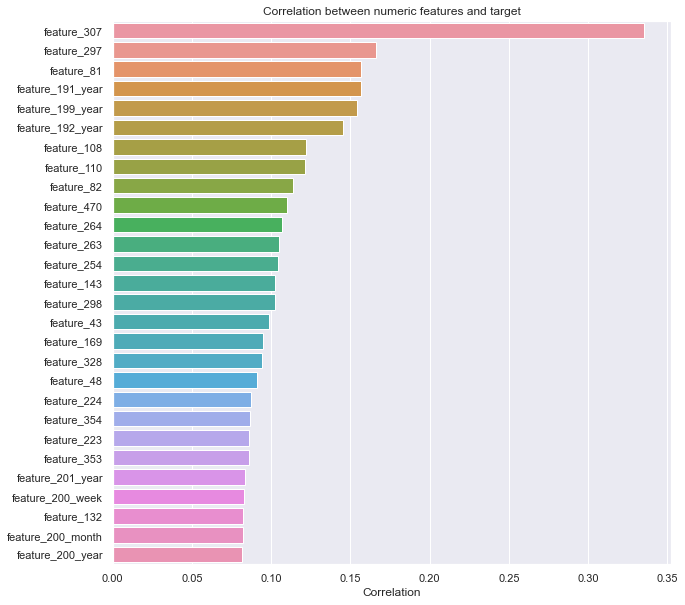

In [31]:

plt.figure(figsize=(10,10))

sns.barplot(x=corr_df[corr_df>0.08],y=corr_df[corr_df>0.08].index).set_title('Correlation between numeric features and target')
plt.xlabel('Correlation')

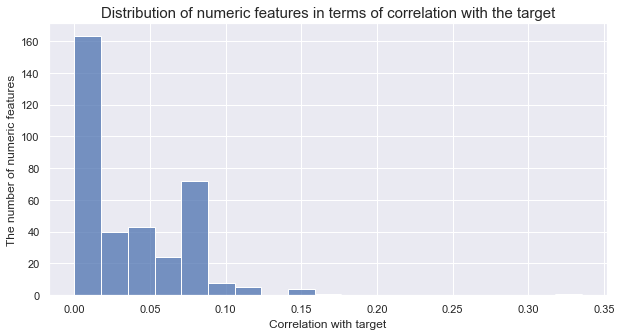

In [32]:
plt.figure(figsize=(10,5))
plt.xlabel('Correlation with target')
plt.ylabel('The number of numeric features')
sns.histplot(corr_df).set_title('Distribution of numeric features in terms of correlation with the target',size=15)
plt.show()

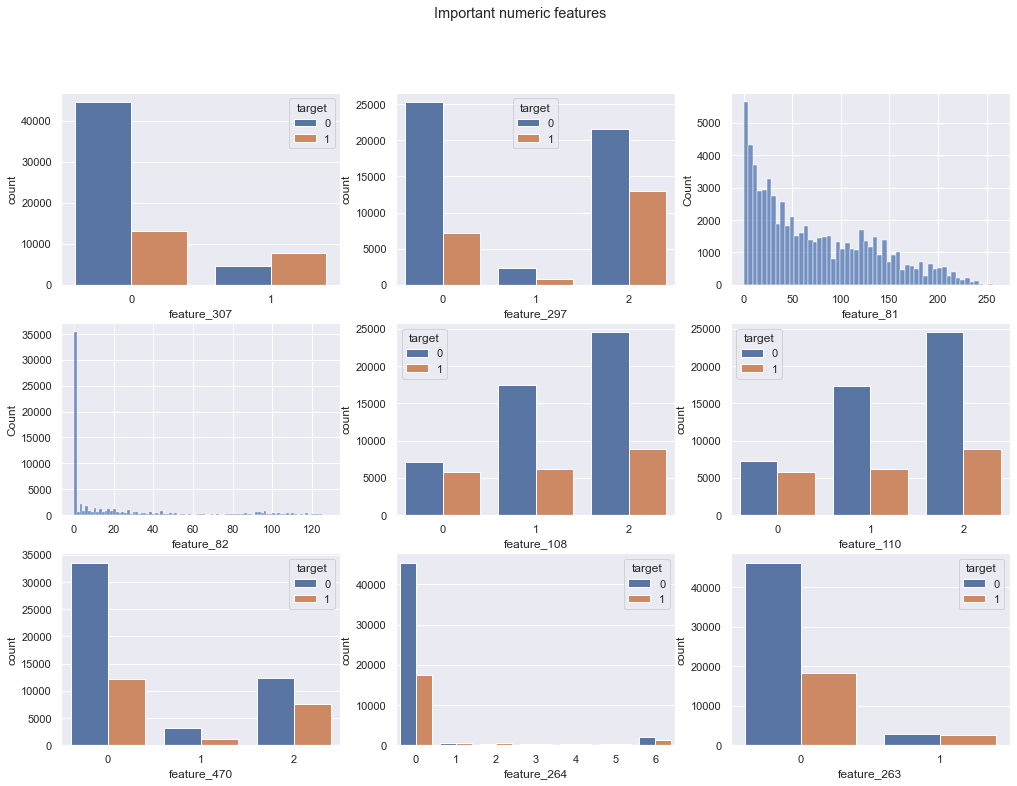

In [33]:
fig, ax = plt.subplots(3,3,figsize=(17,12))
sns.countplot(df_train_copy.feature_307,hue=df_train_copy.target, ax=ax[0][0])
sns.countplot(df_train_copy.feature_297,hue=df_train_copy.target, ax=ax[0][1])
sns.histplot(df_train_copy.feature_81, ax=ax[0][2])
sns.histplot(df_train_copy.feature_82, ax=ax[1][0])
sns.countplot(df_train_copy.feature_108,hue=df_train_copy.target, ax=ax[1][1])
sns.countplot(df_train_copy.feature_110,hue=df_train_copy.target, ax=ax[1][2])
sns.countplot(df_train_copy.feature_470,hue=df_train_copy.target, ax=ax[2][0])
sns.countplot(df_train_copy.feature_264,hue=df_train_copy.target, ax=ax[2][1])
sns.countplot(df_train_copy.feature_263,hue=df_train_copy.target, ax=ax[2][2])

plt.suptitle('Important numeric features')
plt.show()

In [34]:
# Taking sqrt of feature_81
df_train_copy['feature_81_sqrt']= df_train_copy.feature_81.apply(np.sqrt)
df_test_copy['feature_81_sqrt']= df_test_copy.feature_81.apply(np.sqrt)

# Binarization feature_82
df_train_copy['feature_82_binary']=df_train_copy['feature_82'].apply(lambda x: 0 if x==0 else 1)
df_test_copy['feature_82_binary']= df_test_copy['feature_82'].apply(lambda x: 0 if x==0 else 1)

# Multiplication of feature_307 and feature_82_binary
df_train_copy['feature_82_307']= df_train_copy['feature_307']*df_train_copy['feature_82_binary']
df_test_copy['feature_82_307']= df_test_copy['feature_307']*df_test_copy['feature_82_binary']



- Find corr less than 0.002 with target.
- Add to drop list

In [35]:
low_corr=list(corr_df[corr_df<0.002].index)


Features_toDrop+=low_corr
print(len(low_corr),' features added to drop list')

33  features added to drop list


In [36]:
tmp=[]
for col in df_train_copy.columns:
    #If column contains one unique value
    if (( df_train_copy[col].nunique() <=1 )):
        #add to list
        tmp.append(col)
#Filter dataframe
df_train_copy[tmp]

,feature_55,feature_100,feature_149,feature_187,feature_188,feature_190,feature_227,feature_228,feature_248,feature_249,...,feature_484,feature_487,feature_489,feature_491,feature_493,feature_495,feature_498,feature_500,feature_502,feature_505
0,C0,0,0,C0,C0,C0,0,0,C0,C1,...,0,0,0,0,0,0,0,0,0,0
1,C0,0,0,C0,C0,C0,0,0,C0,C1,...,0,0,0,0,0,0,0,0,0,0
2,C0,0,0,C0,C0,C0,0,0,C0,C1,...,0,0,0,0,0,0,0,0,0,0
3,C0,0,0,C0,C0,C0,0,0,C0,C1,...,0,0,0,0,0,0,0,0,0,0
4,C0,0,0,C0,C0,C0,0,0,C0,C1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,C0,0,0,C0,C0,C0,0,0,C0,C1,...,0,0,0,0,0,0,0,0,0,0
69996,C0,0,0,C0,C0,C0,0,0,C0,C1,...,0,0,0,0,0,0,0,0,0,0
69997,C0,0,0,C0,C0,C0,0,0,C0,C1,...,0,0,0,0,0,0,0,0,0,0
69998,C0,0,0,C0,C0,C0,0,0,C0,C1,...,0,0,0,0,0,0,0,0,0,0


In [37]:
#Add to drop list
Features_toDrop+=list(tmp)

print(len(tmp),' features added to drop list')

59  features added to drop list


In [38]:


def get_highly_correlated(df, features, threshold=0.5):
    corr_df = df[features].corr() # get correlations
    correlated_features = np.where(np.abs(corr_df) > threshold) # select ones above the abs threshold
    correlated_features = [(corr_df.iloc[x,y], x, y) for x, y in zip(*correlated_features) if x != y and x < y] # avoid duplication
    s_corr_list = sorted(correlated_features, key=lambda x: -abs(x[0])) # sort by correlation value
    if s_corr_list == []:
        print("There are no highly correlated features with correlation above", threshold)
    else:
        col1,col2,col3=list(),list(),list()
        for v, i, j in s_corr_list:
            col1.append(corr_df.index[i])
            col2.append(corr_df.columns[j])
            col3.append(v)
        col_list=[col1,col2,col3]
        return pd.DataFrame(col_list, index=['F1', 'F2','Correlation']).T.sort_values(by='Correlation',ascending=False)



In [39]:
F_corr_df= get_highly_correlated(df_train_copy[Numeric_Features],Numeric_Features,threshold=0.9)
F_corr_df

,F1,F2,Correlation
0,feature_46,feature_140,1
520,feature_448,feature_464,1
511,feature_444,feature_503,1
513,feature_444,feature_506,1
514,feature_448,feature_450,1
...,...,...,...
419,feature_420,feature_504,-1
416,feature_420,feature_499,-1
415,feature_420,feature_497,-1
411,feature_420,feature_490,-1


In [40]:
#Using set() to get distinct features from the column F1
drop_F1=list( set(F_corr_df.F1[F_corr_df.Correlation>0.9]) ) + list( set(F_corr_df.F1[F_corr_df.Correlation<-0.9]) )

#Drop
Features_toDrop += drop_F1
print(len(drop_F1),' features added to drop list')

188  features added to drop list


In [41]:
Features_toDrop=list(set(Features_toDrop))

df_train_copy.drop(Features_toDrop,axis=1,inplace=True)
df_test_copy.drop(Features_toDrop,axis=1,inplace=True)

#Remove from Categorical_Features list
Categorical_Features = [e for e in Categorical_Features
                        if e not in Features_toDrop]
#Remove from Numeric features list
Numeric_Features=[e for e in Numeric_Features
                  if e not in Features_toDrop]

print(len(Features_toDrop),' Features dropped')

218  Features dropped


In [42]:
df_train_copy.shape, df_test_copy.shape

((70000, 282), (30000, 281))

In [43]:
#Create copy
train_e=df_train_copy.copy()
test_e=df_test_copy.copy()

for col in list(Categorical_Features):
    le = LabelEncoder()
    #fit encoder on train/test at the same time
    le.fit(pd.concat([train_e[col],test_e[col]], ignore_index=True))
    #transform 
    train_e[col]=le.transform(train_e[col])
    test_e[col]=le.transform(test_e[col])

In [44]:
toDrop=['target'] + ['feature_82','feature_192_year','feature_199_year','feature_200_year','feature_201_year']

#Variables
X=train_e.drop(toDrop,axis=1)
y=train_e['target']

X_train,X_valid,y_train,y_valid = train_test_split(X, y, test_size=0.3,random_state=18)

In [45]:
# Parameter grids
LGBM_params = {
    'n_estimators': 10000,
    'learning_rate': 0.01346129943895438,
    'num_leaves': 1230,
    'max_depth': 5,
    'lambda_l1': 9.014424962435049,
    'lambda_l2': 5.09941903202415,
    'min_child_samples': 56,
    'subsample': 0.8210241479916653,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'feature_fraction': 0.6000000000000001,
}

CATBOOST_params = {
    'subsample': 0.50,
    'learning_rate': 0.03,
    "max_depth": 6,
    "min_data_in_leaf": 50,
    "colsample_bylevel": 0.5,
    'random_state':42,
    'num_boost_round': 2000,
    'l2_leaf_reg': 1.0,
    'eval_metric': "AUC",
}

XGB_params = {
   'n_estimators': 14140,
    'learning_rate': 0.0111538499996725174,
    'max_depth': 4,
    'reg_alpha': 2.9735993984217104,
    'reg_lambda': 2.214625977393439,
    'scale_pos_weight': 0.9,
    'subsample': 0.7768428006197691,
    'gamma': 0.5
}

#LGBM
LGBM = LGBMClassifier(**LGBM_params)

#Catboost
CATBOOST = CatBoostClassifier(**CATBOOST_params)

#XGBoost
XGB = XGBClassifier(**XGB_params)

In [46]:


#Returns validation score
def get_val_score(model):
    val_pred = model.predict_proba(X_valid)
    return roc_auc_score(y_valid,val_pred[:,1])



In [47]:
LGBM.fit(X_train,y_train,
         eval_set=[(X_valid, y_valid)],
         early_stopping_rounds=200,verbose=100,eval_metric='auc')
#Get score
print("="*20)
print("LGBM Validation AUC : ", get_val_score(LGBM))

[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] lambda_l1 is set=9.014424962435049, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.014424962435049
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.8210241479916653 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=5.09941903202415, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.09941903202415
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[100]	valid_0's auc: 0.767228	valid_0's binary_logloss: 0.527574
[200]	valid_0's auc: 0.77347	valid_0's binary_logloss: 0.51101
[300]	valid_0's auc: 0.777242	valid_0's binary_logloss: 0.505458
[400]	valid_0's auc: 0.779645	valid_0's binary_logloss: 0.502765
[500]	valid_0's auc: 0.781046	valid_0's binary_logloss: 0.501318
[600]	valid_0's auc: 0

Text(0.5, 1.0, 'LGBM Feature importance')

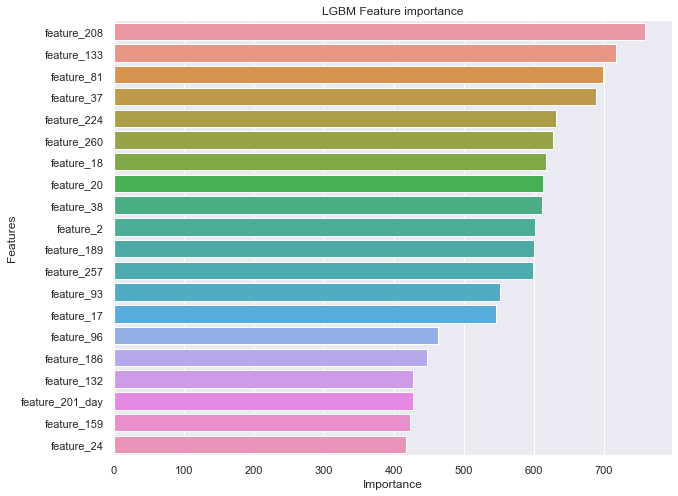

In [48]:
FI=pd.DataFrame({'Features':X.columns,'Importance':LGBM.feature_importances_})
FI=FI.sort_values(by='Importance',ascending=False)[:20]
#plot
plt.figure(figsize=(10,8))
sns.barplot(x=FI.Importance,y=FI.Features).set_title('LGBM Feature importance')

In [49]:
toDrop=['feature_82','feature_192_year','feature_199_year','feature_200_year','feature_201_year']

LGBM_pred=LGBM.predict_proba(test_e.drop(toDrop,axis=1))

In [50]:
test_predictions = 1 * LGBM_pred[:,1] 
# + 0.5 * CATBOOST_pred[:,1] + 0.2 * XGB_pred[:,1]

In [53]:
sample=pd.read_csv('sample_submission.csv')
sample['target']=test_predictions
sample.to_csv('final.csv',index=False)
sample.head(10)

,id,target
0,5,0.417238
1,7,0.325637
2,9,0.316745
3,11,0.120411
4,14,0.288095
5,15,0.201073
6,19,0.114636
7,21,0.152999
8,25,0.374994
9,29,0.171531
